# Introducción a redes neuronales artificiales

* En este Notebook vamos introducir los aspectos más relevantes en relación a la arquitectura de una **red neuronal artificial**. Revisaremos algunos aspectos teóricos, para luego implementar lo aprendido utilizando la librería TensorFlow y continuando con el ejemplo de la clase anterior.

* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Orígenes de las redes neuronales artificiales](#M1)
<span></span><br>
    2. [Redes Neuronales profundas y sus características](#M2)
<span></span><br>
    3. [Neuronas y capas](#M3)
<span></span><br>
    4. [Funciones de activación](#M4)
<span></span><br>
    5. [Gradiente descendiente y propagación hacia atrás](#M5)
<span></span><br>
      5.1. [Propagación hacia atrás clásica](#M51)
      <span></span><br>
      5.2. [Propagación hacia atrás con momentum](#M52)
      <span></span><br>
      5.3. [Propagación hacia atrás en linea y por batches](#M53)
    6. [Optimizadores](#M6)
<span></span><br>
      6.1. [Stochastic Gradient Descent](#M61)
      <span></span><br>
      6.2. [Adaptive Moment Estimation](#M62)
      <span></span><br>
      6.3. [Otros optimizadores](#M63)
      <span></span><br>
      6.4. [Comparación](#M64)
    7. [Ejemplo: Predicción de la eficiencia de combustible](#M7)
<span></span><br>


<hr>

## <a name="M1">1. Orígenes de las redes neuronales artificiales</a>

* Las redes neuronales artificiales (no profundas) son uno de los más antiguos médodos de aprendizaje de máquinas.

* Los modelos de redes neuronales más recientes se han desarrollado desde el 2006, basados en el algoritmo de entrenamiento propuesto por Geoffrey Hinton [[Cite:hinton2006fast]](https://www.mitpressjournals.org/doi/abs/10.1162/neco.2006.18.7.1527), el que finalmente permitió desarrollar redes neuronales profundas (es decir, con muchas capas de profundidad)

* Algunos de los investigadores que han hecho aportes significativos al desarrollo de redes neuronales son los siguientes
  * [Yann LeCun](http://yann.lecun.com/), Facebook y New York University - Reconocimiento óptico de caracteres y visión por computador usando redes neuronales convolucionales (CNN).
  * [Geoffrey Hinton](http://www.cs.toronto.edu/~hinton/), Google y University of Toronto. Creador del aprendizaje profundo y uno de los primeros en adaptar el algoritmo de "propagación hacia atrás" (_backpropagation_) en redes neuronales.
  * [Yoshua Bengio](http://www.iro.umontreal.ca/~bengioy/yoshua_en/index.html), University of Montreal y Botler AI. Investigador con extensa literatura en aprendizaje profundo, redes neuronales y aprendizaje de máquinas.
  * [Andrew Ng](http://www.andrewng.org/), Badiu y Stanford University.  Extensa investigación en aprendizaje profundo, redes neuronales y aplicaciones en robótica.

**Figure 1.LUM: Neural Network Luminaries**

![Neural Network Luminaries](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_1_luminaries_ann.jpg "Neural Network Luminaries")

## <a name="M2">2. Redes Neuronales profundas y sus características</a>

* Una red neuronal profunda no es más que una red neuronal con muchas capas.
  * En el pasado, la dificultad en desarrollar redes neuronales profundas residía en la falta de medios para entrenar sus parámetros.

* Llamaremos **vector de características** al input de una red neuronal, el cual **siempre tendrá un largo constante**.
  * Cambiar el tamaño de un vector de características de entrada generalmente requiere de una re-diseño y re-implementación de la red neuronal.
  * Las redes neuronales profundas, en su versión más básica, pueden procesar inputs no-vectoriales. No obstante, estos requerirán de una operación de "aplanado" (_flatten_)
    * Más adelante veremos que variantes tales como las redes neuronales convolucionales (CNNs), permiten tamaños de input variables sin necesidad de re-entrenar el modelo.


* Como otros modelos de Machine Learning, las redes neuronales pueden ser utilizadas tanto en problemas de regresión como de clasificación:
  * **Regresión** - Output calculado por la red neuronal es un valor numérico contínuo.
  * **Clasificación** - Output calculado por la red neuronal es una clase o categoría.

**Figure 3.CLS-REG: Neural Network Classification and Regression**
![Neural Network Classification and Regression](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_ann_class_reg.png "Neural Network Classification and Regression")

## <a name="M3">3. Neuronas y capas</a>

* Una red neuronal estará típicamente compuesta por unidades individuales interconectadas. Estas unidades de procesamiento se llaman nodo, neurona o unidad.

* El siguiente diagrama muestra la estructura abstracta de una única neurona artificial.

**Figure 3.ANN: An Artificial Neuron**
![An Artificial Neuron](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_abstract_nn.png "An Artificial Neuron")

* A continuación, describimos el procesamiento llevado a cabo por una neurona
  1. Primero, la neurona recibe como input uno o más datos que pueden provenir de otras neuronas, o bien corresponder a las características con las que se alimenta el modelo.
  2. Se multiplica cada uno de estos inputs por un peso para luego obtener una suma ponderada de los inputs.
  3. La suma ponderada es finalmente procesada por una función de activación.

* De este modo, la siguiente ecuación resume el output calculado por una neurona artificial:

  $$ f(x,w) = \phi(\sum_i(\theta_i \cdot x_i)) $$

  * $x$: Input(s),
  * $\theta$: Pesos o parámetros de la neurona,
  * $i$: Índice del ponderador correspondiente a cada input,
  * $\phi(\cdot)$: Función de activación.

* Podemos encadenar o secuenciar muchas neuronas artificiales para crear una red neuronal artificial. La siguiente figura muestra una red neuronal artificial compuesta de tres neuronas:

**Figure 3.ANN-3: Three Neuron Neural Network**
![Three Neuron Neural Network](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/ann-simple.png "Three Neuron Neural Network")

* Para obtener el output de esta red, se debe ejecutar la ecuación anterior tres veces:
  * Dos veces para obtener **N1** y **N2**,
  * Una tercera vez para calcular **N3** a partir de **N1** y **N2**,
  * El output corresponde a $\phi$(**N3**)

* Los diagramas de redes neuronales artificiales generalmente omiten el cálculo de la función de activación (queda implícito en cada nodo), por lo que los diagramas suelen ser como el siguiente:

**Figure 3.SANN-3: Three Neuron Neural Network**
![Three Neuron Neural Network](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/typical-ann.png "Three Neuron Neural Network")

* Los inputs y outputs suelen ser considerados como un tipo particular de neurona e incluidos dentro del diagrama de la red neuronal.
  * En el caso anterior, las neuronas de entrada serían la primera capa,
  * La segunda capa serían las neuronas **N1** y **N2**,
  * La tercera capa contendrá a **N3**
  * El output será **O**.

* La mayoría de las redes neuronales se conforman de capas.
  * Cada neurona en una capa tendrá la misma función de activación.
  * Las funciones de activación pueden variar entre capas
  * La mayoría de las redes neuronales tendrán entre cero y dos capas escondidas
  * **Cada capa conecta completamente con la siguiente capa.**
  * Por tanto, la figura anterior no correspondería a una red neuronal completamente conectada. A continuación podemos ver la versión corregida:

**Figure 3.F-ANN: Fully Connected Neural Network Diagram**
![Fully Connected Neural Network Diagram](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/ann-dense.png "Fully Connected Neural Network Diagram")

* Generalmente hay cuatro tipos distintos de neuronas:
  * **Input Neurons** - Se mapea cada neurona input a uno elemento en el vector de características.
  * **Hidden Neurons** - Neuronas escondidas permiten a la red neuronal la capacidad de abstracción para así procesar el input al output deseado. Estas solo reciben como input a los outputs de otras neuronas.
  * **Output Neurons** - Cada neurona de salida calcula una parte del output.
  * **Bias Neurons** - Similar al intercepto con el eje _y_ en una ecuación lineal. Generalmente se utilizan solo en capas escondidas y tienen un valor constante igual a 1.

* Una pregunta común es "¿cómo determino el número de neuronas escondidas en una red neuronal?"
  * Antes del Deep Learning, los investigadores sugerían que cualquier número mayor a una capa escondida era excesivo [[Cite:hornik1989multilayer]](https://www.sciencedirect.com/science/article/abs/pii/0893608089900208).
  * Un argumento solido para definir esta postura es la demostración de que una red neuronal de una capa puede aproximar cualquier función (aproximador universal).
  * Esta pregunta es bastante compleja, y la iremos respondiendo a medida que avanzamos con los contenidos del curso.

![Neural Network Luminaries](https://miro.medium.com/v2/resize:fit:750/format:webp/1*7s3V4ZUkc1dwxarQM-ExSw.gif "Universal Approximator Theorem")

### ¿Por qué son necesarias las neuronas de sesgo (bias neurons)?

* Mientras las funciones de activación especifican el output de una neurona específica, el conjunto de pesos y sesgo de una neurona dan forma al output de la función de activación para producir el output deseado.

* La siguiente ecuación representa el procesamiento llevado a cabo en una red neuronal con entrada única y una función de activación sigmoide:

$$ f(x,w,b) = \frac{1}{1 + e^{-(wx+b)}} $$

* Por un lado, los pesos de la neurona permiten ajustar la pendiente o la forma de la función de activación, tal como se muestra en el siguiente diagrama donde se consideran:

$$ f(x,0.5,0.0) $$
$$ f(x,1.0,0.0) $$
$$ f(x,1.5,0.0) $$
$$ f(x,2.0,0.0) $$

**Figure 3.A-WEIGHT: Neuron Weight Shifting**
![Adjusting Weight](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_bias_weight.png "Neuron Weight Shifting")

* Podemos notar que, sin importar el peso, siempre se obtiene el mismo valor de 0.5 cuando *x* es 0.

* El sesgo (bias) permite desplazar la curva sigmoide, lo que permite que la función resultante pueda adoptar valores distintos a 0.5 cuando *x* tenga un valor cercano a 0. La siguiente figura muestra el efecto de usar un peso igual a 1.0 con distintos sesgos:

$$ f(x,1.0,1.0) $$
$$ f(x,1.0,0.5) $$
$$ f(x,1.0,1.5) $$
$$ f(x,1.0,2.0) $$

**Figure 3.A-BIAS: Neuron Bias Shifting**
![Adjusting Bias](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_bias_value.png "Neuron Bias Shifting")

## <a name="M4">4. Funciones de activación</a>

* Las funciones de activación, o funciones de transferencia, se usan para calcular el output de cada capa de una red neuronal.

* Las funciones de activación más comúnmente utilizadas en la historia han sido:
  * **Tanh** o tangente hiperbólica: Las más utilizada en capas escondidas hasta la incorporación de ReLU. Retorna valores entre -1 y 1 y corresponde simplemente a la función tangente hiperbólica:

  $$ \phi(x) = \tanh(x) $$

  * **Sigmoide**: Utilizada para el output de redes neuronales para clasificación binaria.

  $$ \phi(x) = \frac{1}{1 + e^{-x}} $$

  * **Activación lineal**: Utilizada para el output de redes neuronales para regresión.

  $$\phi(x) = x$$

* Sin embargo, las redes neuronales modernas comúnmente usan algunas de las siguientes funciones de activación:

  * **Rectified Linear Unit (ReLU)** - Usada para el output de capas escondidas. [[Cite:glorot2011deep]](http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf). Está definida por la siguiente función:

  $$ \phi(x) = \max(0, x) $$

  * **Softmax** - Generalmente se encuentra en la capa de output de algunas redes neuronales para problemas de clasificación multi-clase. La neurona con el valor más alto determina la clase predicha. La función se define como:
  
  $$ \phi_i(x) = \frac{exp(x_i)}{\sum_{j}^{ }exp(x_j)} $$

  donde $i$ representa el índice de la neurona de output calculada y $j$ representa los índices de todas las neuronas en el grupo o nivel.
  
    * Cuando se usa la activación softmax, el output de una neurona es dependiente de los outputs de otras neuronas.
    
    * Para ver a la función de activación softmax en acción, refiérase a [Softmax example website](http://www.heatonresearch.com/aifh/vol3/softmax.html).

  * **Step Activation Function** - Utilizada en las versiones iniciales de redes neuronales (*perceptrons*, McCulloch & Pitts, 1943) [[Cite:mcculloch1943logical]](https://link.springer.com/article/10.1007/BF02478259). La función es igual a 1 si $x>=0.5$ y 0 en cualquier otro caso.

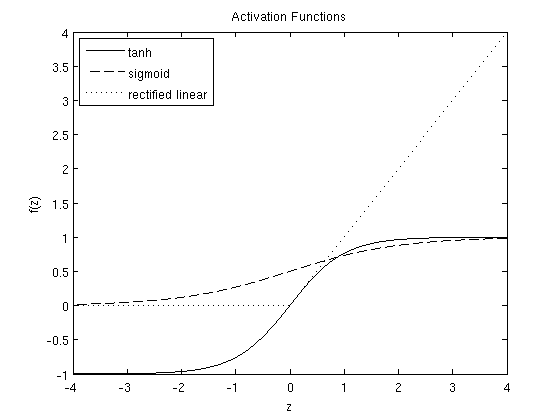

**¿Por qué ReLU?**

* La literatura reciente establece que la mayoría de las capas escondidas de redes neuronales actuales usan activaciones ReLU.

* Retomaremos la discusión en relación al porqué se utiliza comúnmente esta función de activación después de comprender lo que es el método de gradiente descendiente, utililizado para ajustar los pesos de las redes neuronales.

<hr>


## <a name="M5">5. Gradiente descendiente y propagación hacia atrás</a>

* La propagación hacia atrás (*back-propagation*) [[Cite:rumelhart1986learning]](https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf) es el método más común para entrenar una red neuronal.
  * Rumelhart, Hinton, & Williams introdujeron la propagación hacia atrás, que se mantiene como la técnica de entrenamiento más popular al día de hoy.
  * Los programadores frecuentemente entrenan redes neuronales profundas usando propagación hacia atrás porque corre bastante bien  en (GPUs).
  
* La propagación hacia atrás cuenta con una serie de variaciones con respecto a su versión clásica, dando lugar a muchos diferentes tipos de algoritmos de entrenamiento.

### <a name="M51">5.1. Porpagación hacia atrás clásica</a>

* Se calcula una diferencial ($v_t$) para cada peso de una red neuronal ($\theta$), el cual es restado al peso respectivo:

$$ \theta_t = \theta_{t-1} - v_t $$

* Este proceso se repite para cada iteración $t$, de modo que el algoritmo determina cuánto cambia cada peso según al gradiente $\nabla$ de la función de pérdida con respecto a ese mismo peso. El gradiente es ponderado por una razón o velocidad de aprendizaje (*learning rate*, $\eta$):

$$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) $$

* La configuración del *learning rate*, importante para el correcto funcionamiento de la propagación hacia atrás, puede llegar a ser compleja:
  * Un *learning rate* demasiado pequeño puede prolongar el tiempo de entrenamiento y caer en mínimos locales.
  * Por otro lado, un *learning rate* demasiado grande puede no converger a una solución (ni óptima, ni sub-óptima).

* Valores comúnes para probar como *learning rate* son 0.1, 0.01, 0.001, etc.

* Como, en principio, la red neuronal estimará un valor alejado del output esperado, el gradiente (o derivada parcial) de cada peso indicará cómo modificar estos pesos para alcanzar el output esperado.
  * Una vez que se alcanza dicho valor esperado, el gradiente del error será cero y los pesos no se seguiran actualizando.

* Consideremos el gráfico de error de una red neuronal según el valor de un determinado peso de la red:

**Figure 4.DRV: Derivative**
![Derivative](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_deriv.png "Derivative")

* Podemos notar que el peso óptimo está donde el error es mínimo ($w \approx 2.2$).

* Si nuestro peso es inicializado en donde se encuentra la intersección con la recta azul ($w = 1.5$), que es la pendiente de la función de pérdida en dicho punto, movernos en la dirección del negativo del gradiente nos llevará a minimizar gradualmente el error.

### <a name="M52">5.2. Propagación hacia atrás con momentum</a>

* Al considerar el momentum, añadimos un término extra al cálculo de $v_t$, que corresponde a la anterior velocidad de cambio de un determinado peso ($v_{t-1}$):

$$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) + \lambda v_{t-1} $$

* Tal como el *learning rate*, el momentum añade otro hiper-parámetro que escala el efecto del momentum ($\lambda$).

* Esta técnica añade un "impulso" de cambio adicional en la dirección en la que ya se estaba moviendo el peso y, tal como podemos ver en la Figura, ayuda a sobrepasar mínimos locales.

**Figure 4.MTM: Momentum**
![Momentum](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_5_momentum.png "Momentum")

* Un valor típico de configuración del momentum es $\lambda=0.9$.


### <a name="M53">5.3. Propagación hacia atrás en linea y por batches</a>

* ¿Qué tan seguido deben actualizarse los pesos de una red neuronal?

* Podemos calcular los gradientes ya sea para un elemento particular del set de entrenamiento, o bien podemos sumar los gradientes de varios elementos y sumarlos en *batches*, de modo que la actualización del peso se realice *una vez por batch*:
  * **Entrenamiento en linea _(Online Training)_** - Los pesos se actualizan en base a los gradientes calculados para cada muestra de entrenamiento.
  * **Entrenamiento por _batches_** - Los pesos se actualizan en base a la suma de los gradientes obtenidos para un sub-conjunto de muestras de entrenamiento.
  * **_Batch Size_** - Tamaño del batch a considerar a la hora de sumar los gradientes.
  * **_Mini-Batch Training_** - Lo mismo que el entrenamiento por _batches_, pero con un _batch size_ pequeño. Se considera como _mini-batches_ a aquellos en el rango de 32 a 64 elementos.

* Debido a que el _batch size_ es menor al tamaño completo del set de entrenamiento, probablemente se requieran varios batches para recorrer completamente el set de entrenamiento. Considerando esto, aparecen nuevos hiper-parámetros:
  * **Step/Iteration** - Número de _batches_ procesados.
  * **Epoch** - Número de veces en la que el algoritmo ha procesado todo el set de entrenamiento.

<hr>


## <a name="M6">6. Optimizadores</a>

### <a name="M61">6.1. Descenso de gradiente estocástico</a>

* El método *Stochastic gradient descent* (SGD), el más popular para entrenar redes neuronales, es un entrenamiento de tipo *Batch/Mini-Batch* en el que los *batches* son formados de forma aleatoria.

* Como se muestra en la siguiente figure, esta técnica lleva a una convergencia muy irregular durante el entrenamiento:

**Figure 4.SGD: SGD Error**
![SGD Error](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_5_sgd_error.png "SGD Error")
[Image from Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

* Algunas ventajas de SGD son las siguientes:
  * **Eficiencia computacional:** Cada *step* de entrenamiento puede ser relativamente rápido, incluso con un gran set de entrenamiento,
  * **Disminución del _overfitting_** al enfocarse solo en una porción del set de entrenamiento en cada _step_.


### <a name="M62">6.2. Adaptive Moment Estimation</a>

* Un gran inconveniente con los algoritmos clásicos de propagación hacia atrás es que son susceptibles a la configuración del *learning rate* y del momentum.
  * El *Learning rate* debe ser ajustado en valor lo suficientemente bajo para entrenar una red neuronal de forma óptima.
  * El Momentum debe ser lo suficientemente grande para sobrepasar mínimos locales, pero suficientemente pequeño para no desestabilizar el entrenamiento.
  * Generalmente, el ajuste de un valor constante de *learning rate*/momentum no es suficientemente óptimo durante todo el proceso de entrenamiento.
  * Debido a esto, sería deseable automatizar el descenso del *learning rate* a medida que el entrenamiento progresa.
  * Todos los pesos comparten un mismo *learning rate*/momentum.

* El optimizador *Adaptive Moment Estimation* (ADAM), introducido por  Kingma and Ba (2014) [[Cite:kingma2014adam]](https://arxiv.org/abs/1412.6980), estima el primer (promedio) y segundo (varianza) momento del gradiente para calcular las correcciones de los pesos.

* Adam empieza con un promedio exponencialmente decreciente de los gradientes anteriores (m):

$$ m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t $$

* Este promedio logra un objetivo similar al de la actualización basada en momentum clásica. Sin embargo, su valor es calculado de forma automática en base al gradiente actual ($g_t$).

* Luego, la regla de actualización calcula el segundo momento ($v_t$):

$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2 $$

* Los valores $m_t$ y $v_t$ son estimaciones del primer (promedio) y segundo momento (varianza no centrada) de los gradientes.
  * Sin embargo, estas estimaciones estarán fuertemente sesgadas hacia cero en los primeros ciclos de entrenamiento.  
  * En esos casos, el sesgo del primer momento es corregido de la siguiente forma:
  
  $$ \hat{m}_t = \frac{m_t}{1-\beta^t_1} $$

  * El segundo momento también es corregido de forma similar:
  
  $$ \hat{v}_t = \frac{v_t}{1-\beta_2^t} $$

* Finalmente estos momentos con corrección de sesgo son aplicados a la regla de actualización final de Adam:

$$ \theta_t = \theta_{t-1} - \frac{\alpha \cdot \hat{m}_t}{\sqrt{\hat{v}_t}+\eta} \hat{m}_t $$

* Adam es muy tolerante al valor inicial del *learning rate* (\alpha) y a otros parámetros de entrenamiento.
  * Los autores, Kingma and Ba (2014), recomiendan valores por defecto de 0.9 para $\beta_1$, 0.999 para $\beta_2$ y 10-8 para $\eta$.


### <a name="M63">6.3. Otros optimizadores</a>

* **Resilient Propagation** - Usa solo la magnitud del gradiente y permite a cada neurona aprender a su propia velocidad. No hay necesidad de configurar un *learning rate* ni un momentum; sin embargo, solo funciona en modo *full batch*.
* **Nesterov accelerated gradient** - Ayuda a mitigar el riesgo de escoger un *mini-batch* sub-óptimo.
* **Adagrad** - Permite configurar *learning rate* y momentum con decaimiento automático por cada peso.
* **Adadelta** - Extensión de Adagrad que busca reducir el agresivo y monotónico decaimiento del *learning rate*.
* **Non-Gradient Methods** - Métodos no basados en gradientes pueden ser útiles en _ciertas_ ocasiones, pero raramente sobrepasan a los métodos de propagación hacia atrás basados en gradientes.
  * [Simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing),
  * [Genetic algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm)
  * [Particle swarm optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization),
  * [Nelder Mead](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method),
  * [Entre otros](https://en.wikipedia.org/wiki/Category:Optimization_algorithms_and_methods).


### <a name="M64">6.4. Comparación</a>

* La siguiente imagen muestra, con un ejemplo ilustrativo, como funciona el entrenamiento con cada uno de estos optimizadores.

![Training Techniques](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/contours_evaluation_optimizers.gif "Training Techniques")
Image credits: [Alec Radford](https://scholar.google.com/citations?user=dOad5HoAAAAJ&hl=en)

* TensorFlow admite que la regla de actualización sea configurada como cualquiera de las siguientes:
  * Adagrad
  * **Adam**
  * Ftrl
  * Momentum
  * RMSProp
  * **SGD**

**Retomando la discusión... ¿Por qué ReLU?**

* La activación ReLU es una de las mejoras críticas que hizo posible el funcionamiento de redes neuronales profundas [[Cite:nair2010rectified]](https://www.cs.toronto.edu/~hinton/absps/reluICML.pdf)

* Esto es debido a que, cuando la activación sigmoide era la que prevalecía, se hacía difícil el entrenamiento de redes neuronales mediante el método de descenso de gradiente.
  * La derivada de la función sigmoide esta dada por (formato computacionalmente eficiente):

  $$ \phi'(x)=\phi(x)(1-\phi(x)) $$

  * [Para ver cómo determinar esta derivada, [refiérase al siguiente artículo](http://www.heatonresearch.com/aifh/vol3/deriv_sigmoid.html).
  
  * La siguiente figura muestra la derivada y la razón de cambio instantáneo:

**Figure 3.SDERV: Sigmoid Derivative**
![Sigmoid Derivative](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_deriv_sigmoid.png "Sigmoid Derivative")

  * Podemos observar que la derivada satura rápidamente a cero a medida que $x$ se aleja de cero.

  * Este problema no se produce al considerar la activación ReLU, cuya derivada está dada por:

  $$ \phi'(x) = \begin{cases} 1 & x > 0 \\ 0 & x \leq 0 \end{cases} $$

<hr>

## <a name="M7">7. Ejemplo: Predicción de la eficiencia de combustible </a>

* Este tutorial usa la base de datos [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y demuestra como construir un modelo de regresión lineal para intentar predecir la eficiencia de combustible de automóviles de fines de los 70s y principios de los 80s. Para hacer esto, se utilizarán descripciones de muchos automóviles de ese período de tiempo para entrenar el modelo. Esta descripción incluye atributos tales como las cilindradas, el desplazamiento, los caballos de de fuerza y el peso.

* Para resolver este problema de Regresión, vamos a utilizar la librería **TensorFlow**. Este será nuestro primer acercamiento a esta librería que, junto con **PyTorch**, son las principales para el desarrollo de modelos de Deep Learning.

* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    7.1. [Carga de datos](#M71)
<span></span><br>
    7.2. [Pre-procesamiento de los datos](#M72)
<span></span><br>
    7.3. [Partición de los datos](#M73)
<span></span><br>
    7.4. [Normalización de los datos](#M74)
<span></span><br>
    7.5. [Resolución con regresión lineal multi-variable](#M75)
<span></span><br>
    7.6. [Resolución con red neuronal artificial multi-variable](#M76)
<span></span><br>
    7.7. [Rendimiento de los modelos](#M77)
<span></span><br>
    7.8. [Guardar y cargar modelos](#M78)
<span></span><br>
    7.9. [Preguntas](#M79)


* En primer lugar vamos a importar las librería necesarias:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.17.0


<hr>


### <a name="M61">6.1. Carga de datos</a>

* La base de datos *Auto MPG* se encuentra disponible en el repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


<hr>


### <a name="M62">6.2. Pre-procesamiento de los datos</a>

* **Limpieza de la base de datos:** Eliminamos filas de la base de datos que contienen valores indeterminados.

* Además, aplicamos codificación *one hot* en la columna `"Origin"` usando [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).


In [3]:
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

<ipython-input-3-20c0de3404ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


<hr>


### <a name="M63">6.3. Partición de los datos</a>

* Particionamos los datos para, una vez ajustado nuestro modelo de regresión usando el set de entrenamiento, utilizar el set de testeo para evaluar el modelo resultante.

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [8]:
train_features.shape

(314, 9)

<hr>


### <a name="M64">6.4. Normalización de los datos</a>

* Los rangos de valores para cada cararcterística son bastante diferentes.

* La capa de Keras `tf.keras.layers.Normalization` es una forma limpia y simple de agregar normalización de características a nuestro modelo.

In [5]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

<hr>


### <a name="M65">6.5. Resolución con regresión lineal multi-variable</a>

* Implementaremos un modelo de regresión lineal solo para fines comparativos.

* Este modelo asume la forma $y = mx+b$, con $m$ siendo una matriz y $x$ un vector.

* Creamos un modelo Keras Sequential de dos pasos con la primera capa correspondiente al operador `normalizer` (`tf.keras.layers.Normalization(axis=-1)`) que definimos anteriormente, ya adaptado al set de datos completo:

In [13]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

* Configuramos el modelo con la función de Keras `Model.compile` y entrenamos con `Model.fit` durante 100 épocas:

* Podemos confirmar que los pesos de matriz $m$, o pesos del kernel, tengan la forma `(9, 1)`.

In [15]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [19]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.5237 - val_loss: 2.4502
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.4054 - val_loss: 2.4915
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2330 - val_loss: 2.4589
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4488 - val_loss: 2.5052
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4947 - val_loss: 2.4497
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3661 - val_loss: 2.5364
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5864 - val_loss: 2.4768
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3690 - val_loss: 2.5145
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5158 - val_loss: 2.4751
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4845 - val_loss: 2.4699
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4956 - val_loss: 2.4713
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4747 - val_loss: 2.472

In [18]:
linear_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (212.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 22 (92.00 B)

In [21]:
linear_model.layers[1].bias

<KerasVariable shape=(1,), dtype=float32, path=sequential_2/dense_2/bias>

* Podemos visualizar el progreso del entrenamiento usando las estadísticas guardadas en el objeto `history`.

* Usar todos los inputs o características en este modelo de regresión permite obtener un error de entrenamiento y de validación mucho menor que en el caso del modelo uni-variable (clase anterior):

In [22]:
def plot_loss(history,y_max=40):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, y_max])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

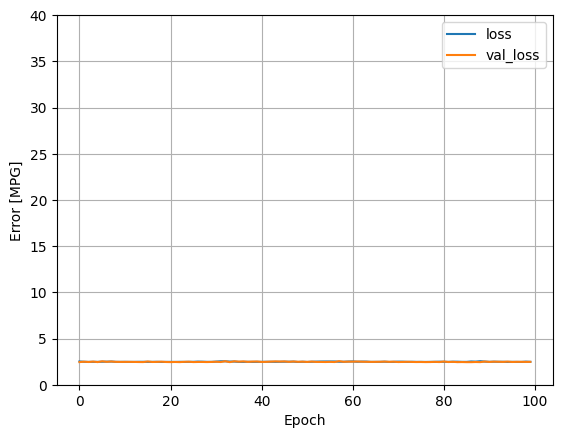

In [23]:
plot_loss(history)

* Por último, recolectamos los resultados de testeo para más tarde:

In [25]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [26]:
test_results

{'linear_model': 2.5198867321014404}

<hr>


### <a name="M66">6.6. Resolución con red neuronal artificial multi-variable</a>

* Repetimos el proceso anterior, pero ahora considerando como modelo una red neuronal artificial.

* El código es básicamente el mismo con respecto a la regresión lineal, excepto que es expandido para incluir algunas capas "escondidas" y no lineales.

* El total de capas de este modelo serán:

  * La capa de normalización, al igual que en el modelo anterior (`horsepower_normalizer` para modelo uni-variable y `normalizer` para modelo multi-variable).
  * Dos capas `Dense` escondidas y no lineales, con una función de activación ReLU (`relu`).
  * Una capa lineal `Dense` con un único output.

* Se utiliza el mismo procedimiento de entrenamiento que en la regresión lineal anterior, por lo que el método `compile` está incluido en la función `build_and_compile_model`.

In [27]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu',),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [28]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [30]:
a = np.random.rand(1,9)
dnn_model(a)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.231]], dtype=float32)>

In [31]:
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (1, 9)                      │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (1, 64)                     │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 64)                     │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (1, 1)                      │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,884 (19.08 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 19 (80.00 B)

* Ejecutamos el entrenamiento y luego graficamos la función de pérdida obtenida al final de cada época de entrenamiento.

In [32]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.33 s, sys: 339 ms, total: 8.67 s
Wall time: 10.7 s


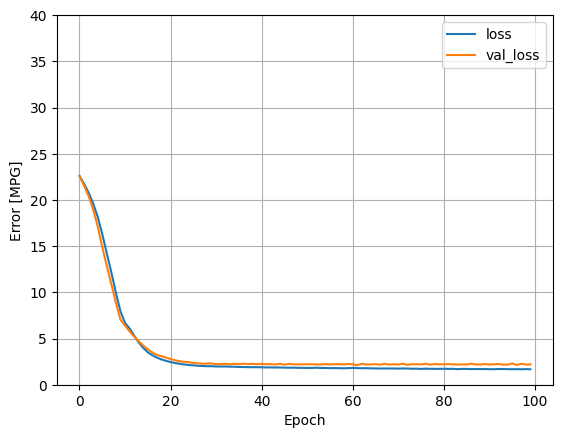

In [33]:
plot_loss(history)

* Recolectamos los resultados obtenidos desde el subset de testeo:

In [34]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [35]:
test_results

{'linear_model': 2.5198867321014404, 'dnn_model': 1.6812442541122437}

<hr>


### <a name="M67">6.7. Rendimiento de los modelos</a>

* Ya que todos los modelos han sido entrenados, podemos revisar su rendimiento en el set de testeo:

In [36]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,2.519887
dnn_model,1.681244


* Estos resultados concuerdan con el error de validación observado durante el entrenamiento.

* Ahora también podemos hacer predicciones con cualquiera de los modelos con las muestras del subset de testeo usando la función de Keras `Model.predict` y revisar el error:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


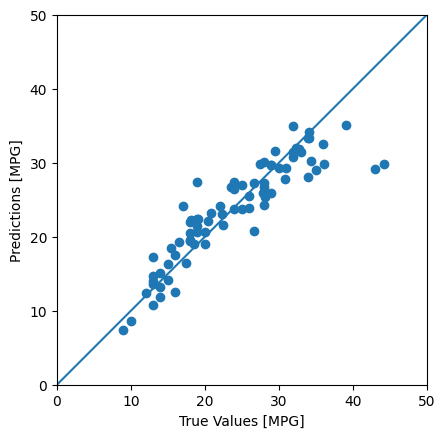

In [38]:
# Cambie el modelo a aquel que desee testear
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<hr>


### <a name="M68">6.8. Guardar y cargar modelos</a>

* En este ejemplo trabajamos con una red neuronal bastante pequeña. Sin embargo, redes neuronales más complejas requieren de largos tiempos de entrenamiento.

* En estos casos, resulta útil guardar estos modelos para poder re-cargarlos más tarde, sin requerir la repetición del proceso de entrenamiento.

* Keras permite guardar redes neuronales en tres formatos:
  * **JSON** - Guarda la estructura de la red neuronal (**sin pesos**) en un [archivo en formato JSON](https://en.wikipedia.org/wiki/JSON).
  * **HDF5** - Guarda la red neuronal completa (**con pesos**) en el [formato HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) [antiguo formato Keras].
  * **Keras v3** - Formato con extensión .keras de bajo peso [recomendado].

* De este modo, si ya estamos conformes con el modelo resultante, podemos guardarlo para volver a usarlo más tarde usando la función `Model.save`:

In [39]:
# Change the model to the one that you want to save
dnn_model.save('dnn_model.keras')

* Si re-cargas el modelo, este retornará exactamente las mismas predicciones:

In [40]:
# Change the model to the one that you want to reload
reloaded = tf.keras.models.load_model('dnn_model.keras')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [41]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,2.519887
dnn_model,1.681244
reloaded,1.681244


<hr>


### <a name="M69">6.9. Preguntas</a>

1. ¿Podríamos haber considerado alguna otra función de pérdida distinta al error absoluto medio (`tf.keras.losses.MeanAbsoluteError`)? ¿Hubiéramos observado un comportamiento similar? *Hint:* El error absoluto medio es menos sensible a los *outliers*.

2. ¿Qué diferencias podemos notar con un problema de clasificación? ¿Existen diferencias en la forma de evaluar el rendimiento en ambos problemas (regresión v/s clasificación)?

3. En el caso de las redes neuronales profundas, un problema frecuente es el sobre-ajuste (*over-fitting*). Sin embargo, esto no fue un problema en este tutorial. ¿A qué crees que se deba esto?.